In [1]:
colab = False

if colab:
    from google.colab import drive
    drive.mount('/content/drive')
    root = '/content/drive/MyDrive/colab/sat-images/'
    device = 'cuda'
    !wget -O sat.zip https://github.com/lacykaltgr/satellite-image-segmentation/archive/refs/heads/laci420.zip
    !unzip sat.zip
    !cp -r satellite-image-segmentation-laci420/src .
else:
    root = '/Users/laszlofreund/code/ai/satellite-image-segmentation/data/'
    device = 'mps'

In [2]:
import torch
from torch.utils.data import DataLoader
from src.dataset import XYDataset, load_dataset

x_train, y_train, x_val, y_val, x_test = load_dataset(root)

train_dataset = XYDataset(x_train, y_train, crop_size=256)
val_dataset = XYDataset(x_val, y_val, crop_size=256)
#test_dataset = XYDataset(x_test, torch.zeros(len(x_test)))

batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
#test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [3]:
from src.model import UNet, EarlyStopper
unet = UNet().to(device)

In [4]:
es = EarlyStopper(patience=10)
unet.train_model(train_loader, val_loader, es, num_epochs=1000, learning_rate=0.0001, device=device)

RuntimeError: MPS backend out of memory (MPS allocated: 15.73 GB, other allocations: 2.35 GB, max allowed: 18.13 GB). Tried to allocate 256.00 MB on private pool. Use PYTORCH_MPS_HIGH_WATERMARK_RATIO=0.0 to disable upper limit for memory allocations (may cause system failure).

In [20]:
predictions, results = unet.predict(train_loader, device=device)

RuntimeError: Invalid buffer size: 8.00 GB

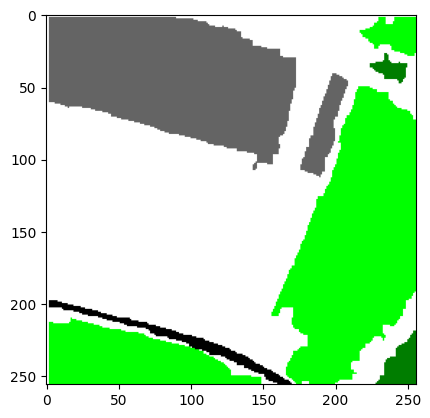

In [7]:
from matplotlib.pyplot import imshow, show
imshow(x)
show()

In [ ]:
from src.utils import conf_matrix
conf_matrix(val_dataset, results)

In [18]:
unet.load_state_dict(torch.load('/Users/laszlofreund/code/ai/satellite-image-segmentation/unet.h5'))

RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.

In [ ]:
eval = unet.evaluate(val_loader, device=device)